# ESOL: Estimating Aqueous Solubility


In [ ]:
!pip install researchpy
# Load libraries
import numpy as np
import pandas as pd
import researchpy as rp
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load dataset
data = pd.read_csv('https://raw.githubusercontent.com/dataprofessor/data/master/delaney_solubility_with_descriptors.csv')
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


## Exploring Data

In [ ]:
# check shape of data
data.shape

(1144, 5)

In [ ]:
# dtypes
data.dtypes

,0
MolLogP,float64
MolWt,float64
NumRotatableBonds,float64
AromaticProportion,float64
logS,float64


In [ ]:
# info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1144 entries, 0 to 1143
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   MolLogP             1144 non-null   float64
 1   MolWt               1144 non-null   float64
 2   NumRotatableBonds   1144 non-null   float64
 3   AromaticProportion  1144 non-null   float64
 4   logS                1144 non-null   float64
dtypes: float64(5)
memory usage: 44.8 KB


In [ ]:
# check missing data
data.isnull().sum()

,0
MolLogP,0
MolWt,0
NumRotatableBonds,0
AromaticProportion,0
logS,0


## Descriptive statistics

In [ ]:
# summary statistics of numerical variables
rp.summary_cont(data[['MolLogP', 'MolWt', 'NumRotatableBonds', 'AromaticProportion', 'logS']])

,Variable,N,Mean,SD,SE,95% Conf.,Interval
0,MolLogP,1144.0,2.4491,1.8660,0.0552,2.3409,2.5574
1,MolWt,1144.0,204.6317,102.6205,3.0340,198.6788,210.5846
2,NumRotatableBonds,1144.0,2.1740,2.6274,0.0777,2.0215,2.3264
3,AromaticProportion,1144.0,0.3649,0.3433,0.0102,0.3450,0.3848
4,logS,1144.0,-3.0580,2.0965,0.0620,-3.1796,-2.9364


## Correlations between Variables

In [ ]:
# correlation: Pearson’s by default
data.corr(method='pearson')

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
MolLogP,1.000000,0.468097,0.205607,0.250977,-0.827959
MolWt,0.468097,1.000000,0.394219,0.098855,-0.637324
NumRotatableBonds,0.205607,0.394219,1.000000,-0.296737,-0.238508
AromaticProportion,0.250977,0.098855,-0.296737,1.000000,-0.268108
logS,-0.827959,-0.637324,-0.238508,-0.268108,1.000000


## Skewness

In [ ]:
# skew
data.skew()

,0
MolLogP,-0.012982
MolWt,0.890477
NumRotatableBonds,2.158178
AromaticProportion,0.226302
logS,-0.484590


## Data visualizations

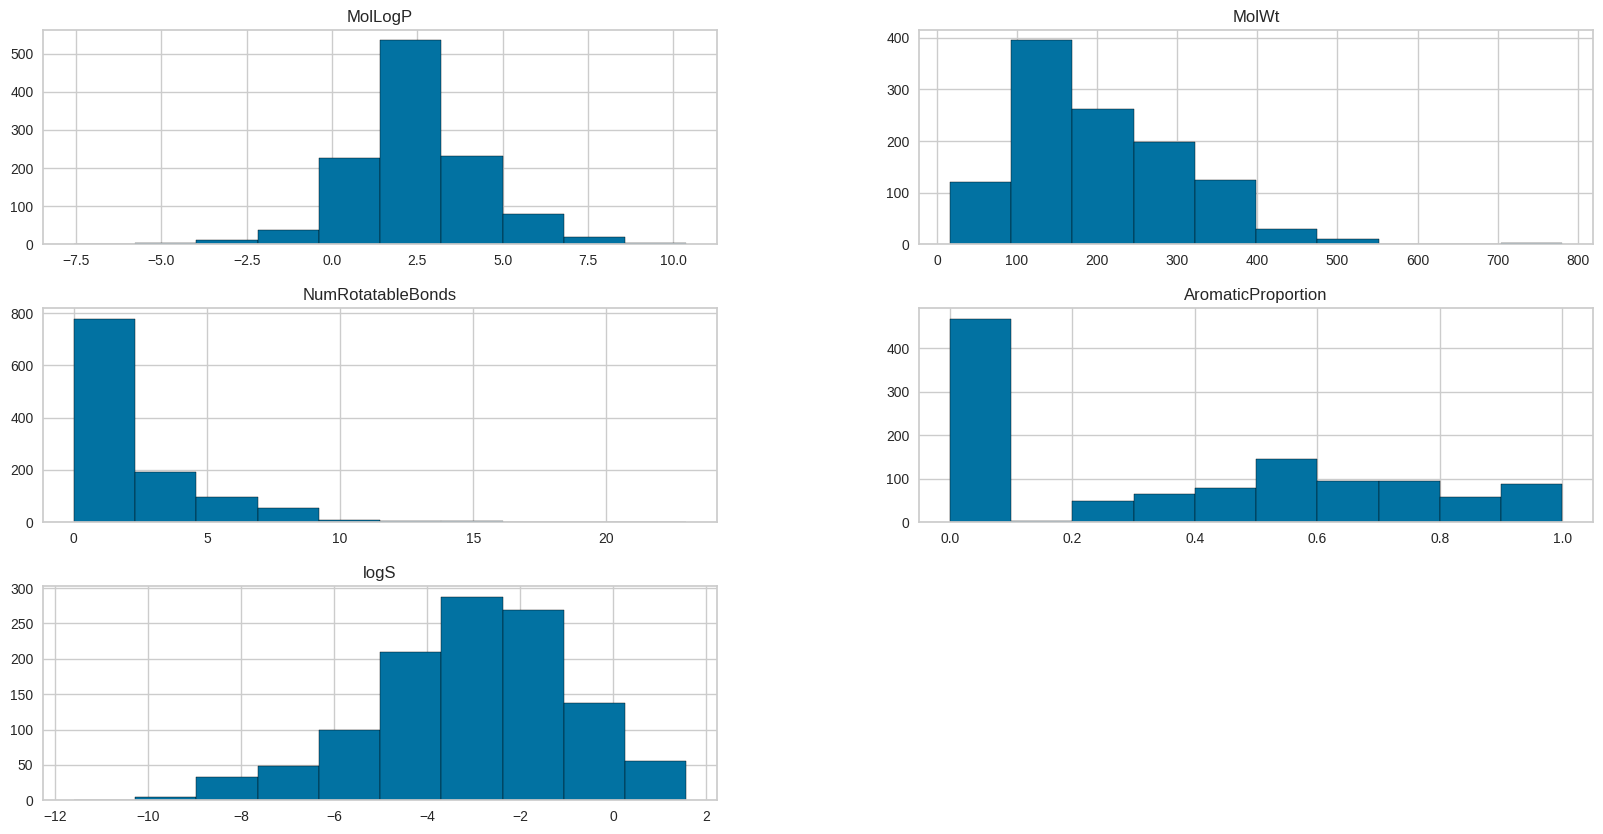

In [ ]:
# Univariate distributions with histogram
data.hist(figsize=(20,10), edgecolor='black')
plt.show()

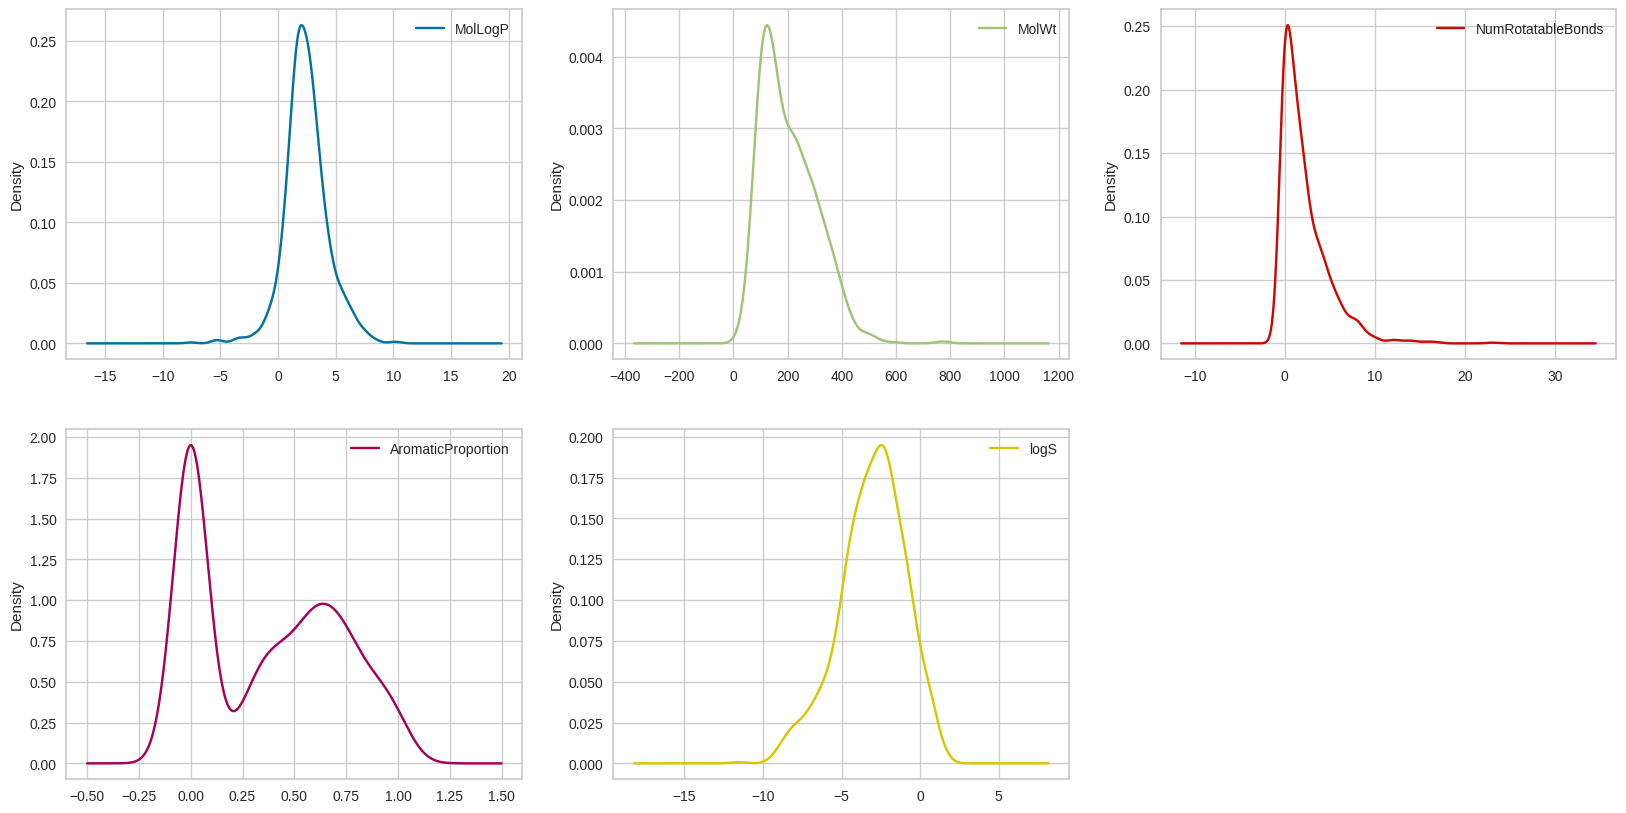

In [ ]:
# Univariate distributions with density plot
data.plot(kind='density', subplots=True, sharex=False, figsize=(20,10), layout=(2,3))
plt.show()

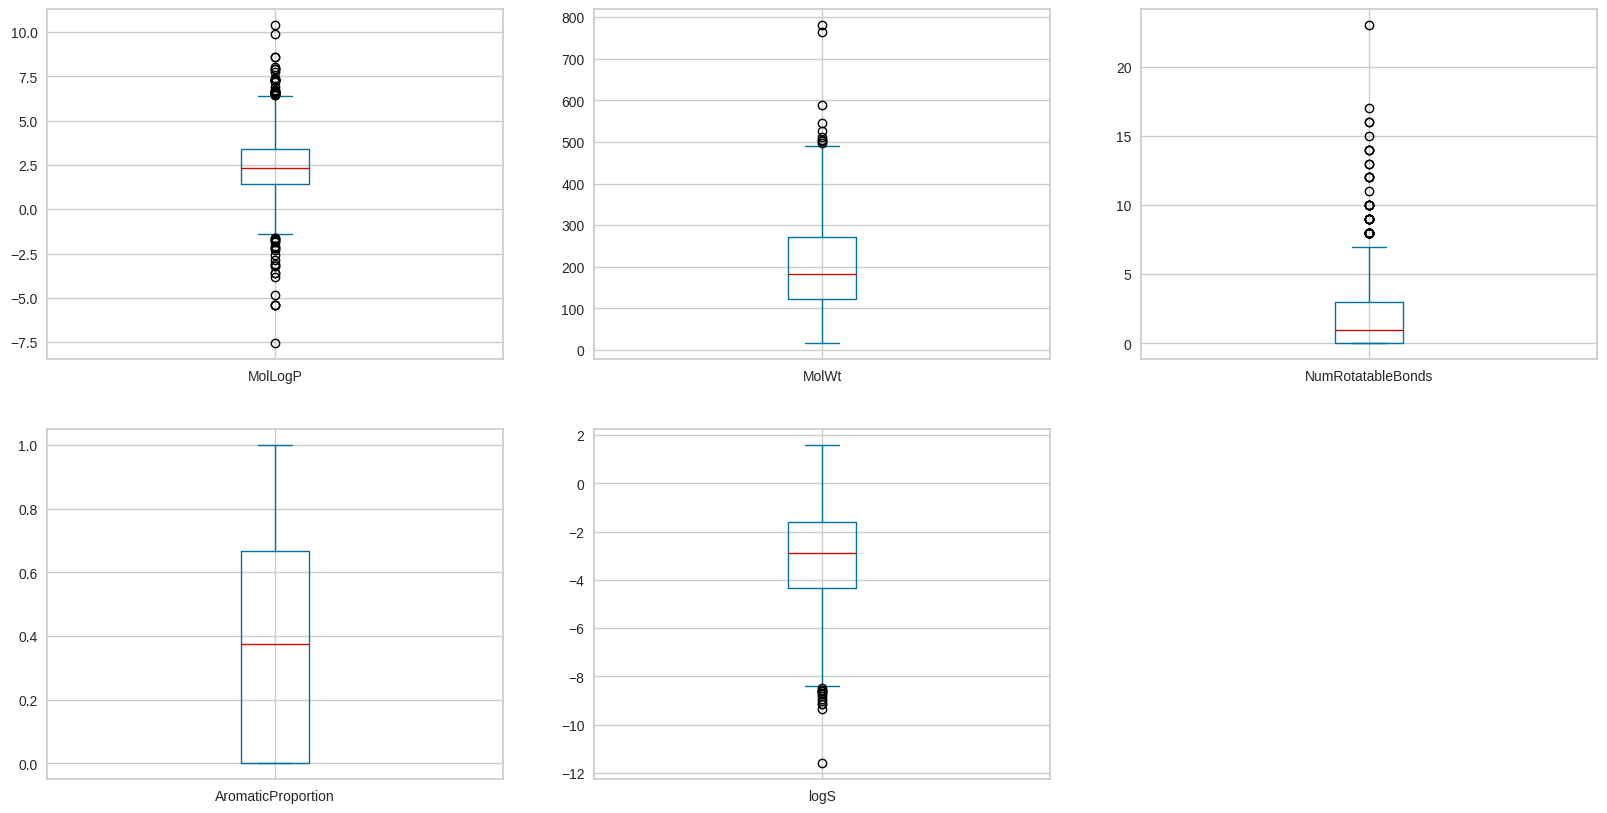

In [ ]:
# Univariate distributions with box plots
data.plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(2,3))
plt.show()

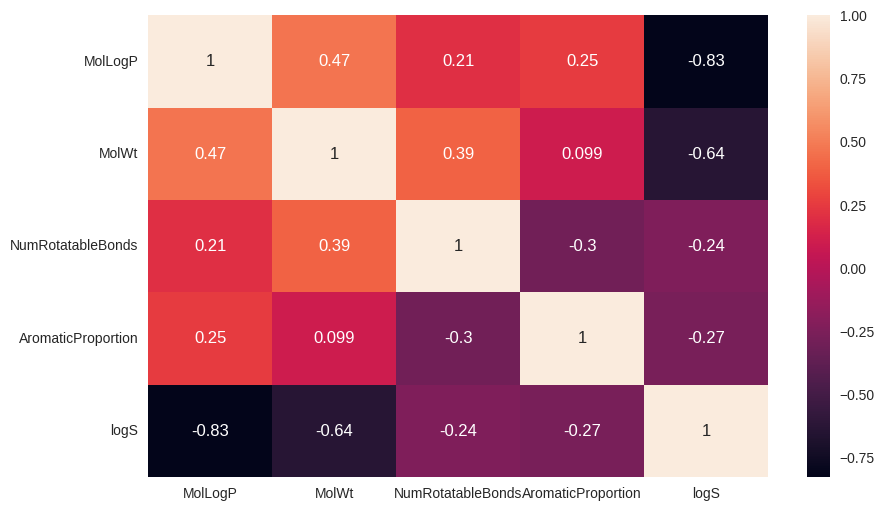

In [ ]:
# Multivariate plots with correlations
plt.figure(figsize=(10,6))
corr = data.corr()
sns.heatmap(corr, annot=True)
plt.show()

## Setup

In [ ]:
# exmine first few rows of data
data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


In [ ]:

# import pycaret classification and init setup
from pycaret.regression import *
setup(data, target = 'logS', train_size = .08, session_id = 123)

,Description,Value
0,Session id,123
1,Target,logS
2,Target type,Regression
3,Original data shape,"(1144, 5)"
4,Transformed data shape,"(1144, 5)"
5,Transformed train set shape,"(91, 5)"
6,Transformed test set shape,"(1053, 5)"
7,Numeric features,4
8,Preprocess,True
9,Imputation type,simple


In [ ]:
!pip install pycaret

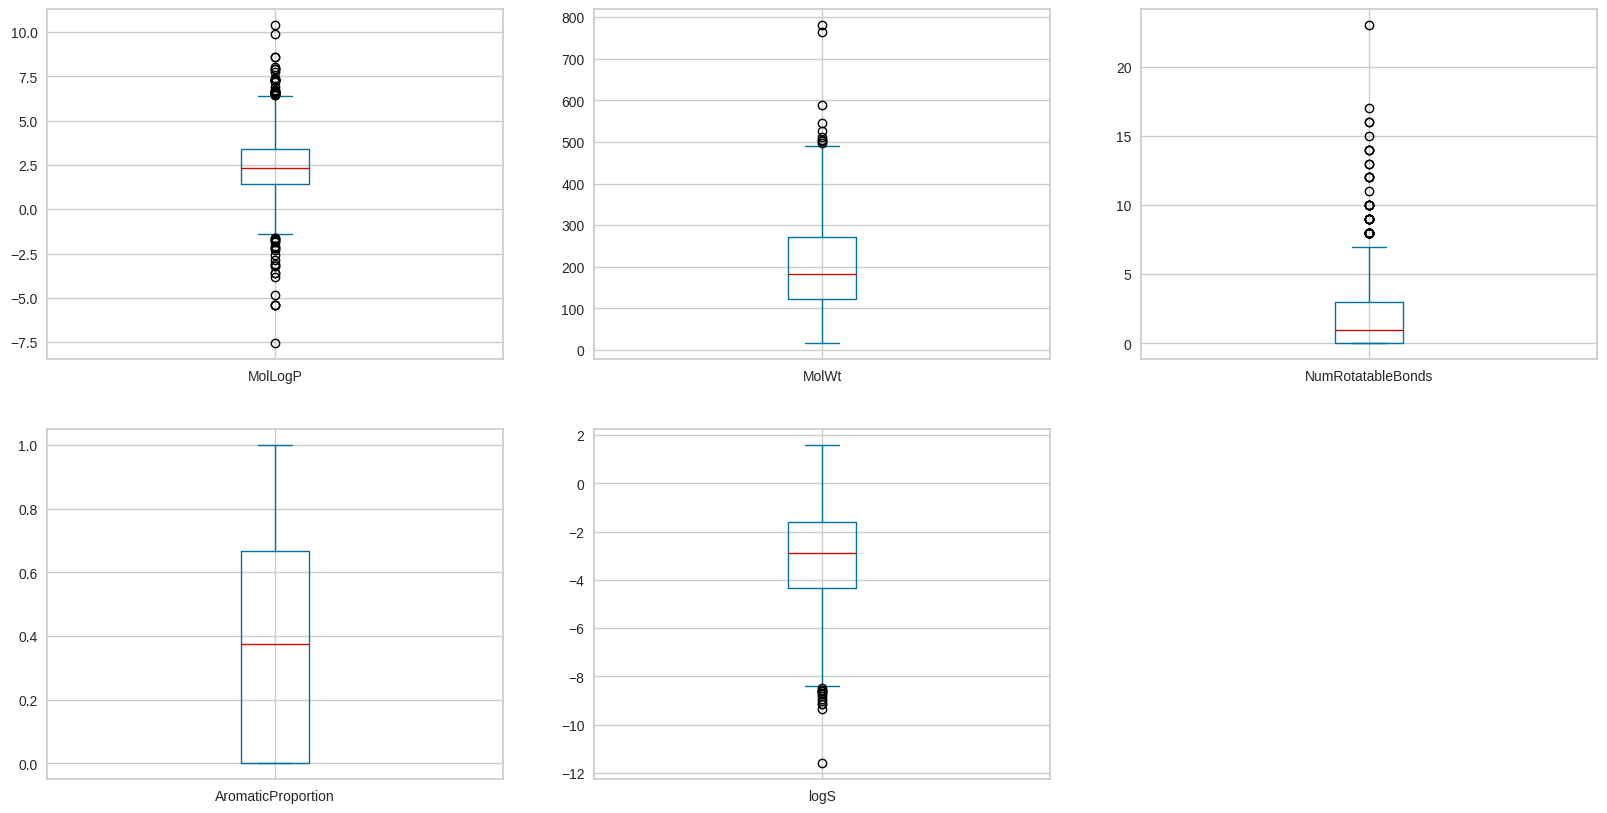

In [ ]:
# Univariate distributions with box plots
data.plot(kind='box', subplots=True, sharex=False, figsize=(20,10), layout=(2,3))
plt.show()

## Compare Models

In [ ]:
# compare baseline models
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.5937,0.6494,0.7821,0.7390,0.2352,0.7942,0.0920
xgboost,Extreme Gradient Boosting,0.6717,0.7659,0.8535,0.7208,0.2651,0.8749,0.0930
ada,AdaBoost Regressor,0.6485,0.7106,0.8192,0.7194,0.2357,0.9273,0.0630
rf,Random Forest Regressor,0.6380,0.7167,0.8258,0.7145,0.2340,0.7976,0.1230
gbr,Gradient Boosting Regressor,0.7260,0.9261,0.9302,0.6608,0.2796,0.7808,0.0510
dt,Decision Tree Regressor,0.7969,1.1005,1.0041,0.5997,0.2734,0.6608,0.0130
br,Bayesian Ridge,0.7751,1.0074,0.9821,0.5870,0.3088,0.7389,0.0130
ridge,Ridge Regression,0.7766,1.0127,0.9846,0.5803,0.3134,0.7068,0.0130
lar,Least Angle Regression,0.7777,1.0167,0.9865,0.5770,0.3149,0.6985,0.0140
lr,Linear Regression,0.7777,1.0167,0.9865,0.5770,0.3149,0.6985,0.6060


Processing:   0%|          | 0/81 [00:00<?, ?it/s]

## Create Model

In [ ]:
# create model
et = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.7295,0.8373,0.9150,0.8146,0.3288,0.6621
1,0.8157,1.2440,1.1153,0.7836,0.3303,4.9049
2,0.5375,0.5803,0.7618,0.6586,0.2491,0.1979
3,0.8610,1.2614,1.1231,0.3416,0.3522,0.4101
4,0.6183,0.5499,0.7415,0.4500,0.1991,0.2389
5,0.4943,0.3524,0.5936,0.8720,0.2104,0.5975
6,0.5046,0.4246,0.6516,0.9291,0.1707,0.3410
7,0.4515,0.4548,0.6744,0.8305,0.2036,0.1969
8,0.4390,0.2893,0.5378,0.9146,0.1561,0.2352


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [ ]:
# print model parameters
print(et)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


## Tune Model

In [ ]:
# tune hyperparameters of et
tuned_et = tune_model(et, n_iter = 50, optimize = "mae")

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.6717,0.8797,0.9379,0.8052,0.2155,0.5385
1,0.8837,1.4049,1.1853,0.7556,0.3791,7.2279
2,0.5826,0.5497,0.7414,0.6766,0.2238,0.1969
3,0.8595,1.2030,1.0968,0.3721,0.3471,0.4514
4,0.9602,1.2808,1.1317,-0.2811,0.3406,0.3575
5,0.6770,0.6198,0.7873,0.7748,0.2719,0.8553
6,0.7719,0.8677,0.9315,0.8552,0.2816,0.6681
7,0.5250,0.4639,0.6811,0.8272,0.2239,0.3013
8,0.7181,0.7877,0.8876,0.7675,0.2306,0.3511


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 50 candidates, totalling 500 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
# print tuned model
print(tuned_et)

ExtraTreesRegressor(n_jobs=-1, random_state=123)


In [ ]:
# to access the tuner object you can set return_tuner = True
tuned_et, tuner = tune_model(et, return_tuner=True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.9344,1.4378,1.1991,0.6816,0.2785,0.7455
1,1.0625,2.0448,1.4300,0.6442,0.4682,9.8673
2,0.5371,0.4696,0.6853,0.7237,0.1925,0.1777
3,0.8078,1.0310,1.0154,0.4619,0.3155,0.4663
4,0.7954,0.8386,0.9157,0.1612,0.2565,0.3240
5,0.7359,0.8366,0.9147,0.6960,0.2983,0.9740
6,1.0848,1.9093,1.3818,0.6814,0.3522,0.8395
7,0.6123,0.6466,0.8041,0.7591,0.2308,0.3274
8,0.8416,1.0428,1.0212,0.6922,0.2639,0.4224


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


In [ ]:
tuned_et

ExtraTreesRegressor(n_jobs=-1, random_state=123)

In [ ]:
tuner

RandomizedSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
                   estimator=Pipeline(memory=Memory(location=None),
                                      steps=[('numerical_imputer',
                                              TransformerWrapper(include=['MolLogP',
                                                                          'MolWt',
                                                                          'NumRotatableBonds',
                                                                          'AromaticProportion'],
                                                                 transformer=SimpleImputer())),
                                             ('categorical_imputer',
                                              TransformerWrapper(include=[],
                                                                 transformer=SimpleImputer(stra...
                                                                                    0.0002,
                                                                                    0.002,
                                                                                    0.02,
                                                                                    0.0005,
                                                                                    0.005,
                                                                                    0.05,
                                                                                    0.1,
                                                                                    0.2,
                                                                                    0.3,
                                                                                    0.4,
                                                                                    0.5],
                                        'actual_estimator__min_samples_leaf': [2,
                                                                               3,
                                                                               4,
                                                                               5,
                                                                               6],
                                        'actual_estimator__min_samples_split': [2,
                                                                                5,
                                                                                7,
                                                                                9,
                                                                                10],
                                        'actual_estimator__n_estimators': [10,
                                                                           20,
                                                                           30,
                                                                           40,
                                                                           50,
                                                                           60,
                                                                           70,
                                                                           80,
                                                                           90,
                                                                           100,
                                                                           110,
                                                                           120,
                                                                           130,
                                                                           140,
                                                                           150,
                                                                           16

## Analyze Model

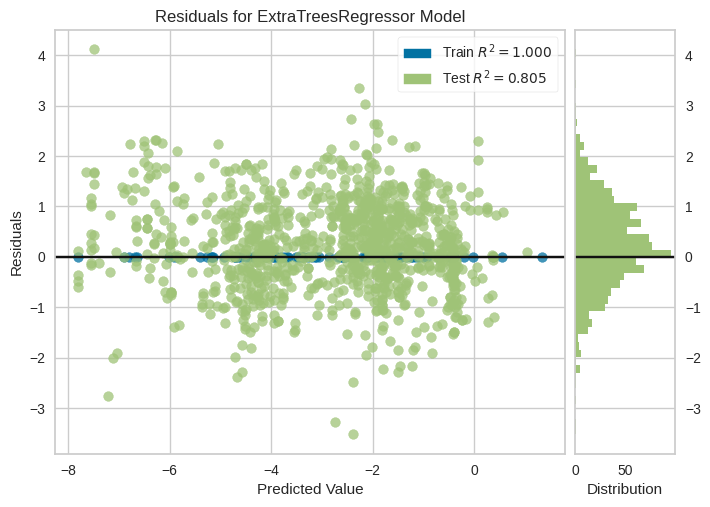

In [ ]:
# residuals plot
plot_model(et, plot = 'residuals')

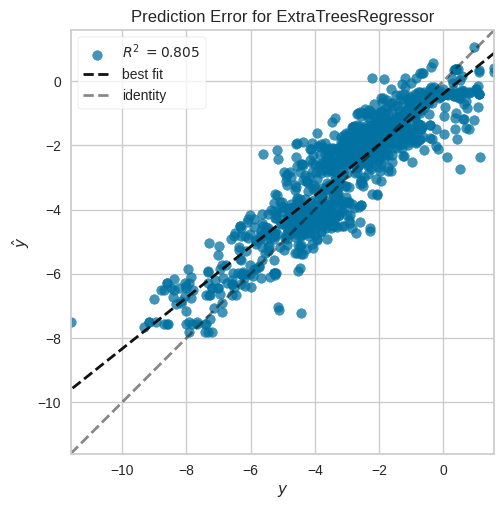

In [ ]:
# predicting error plot
plot_model(et, plot = 'error')

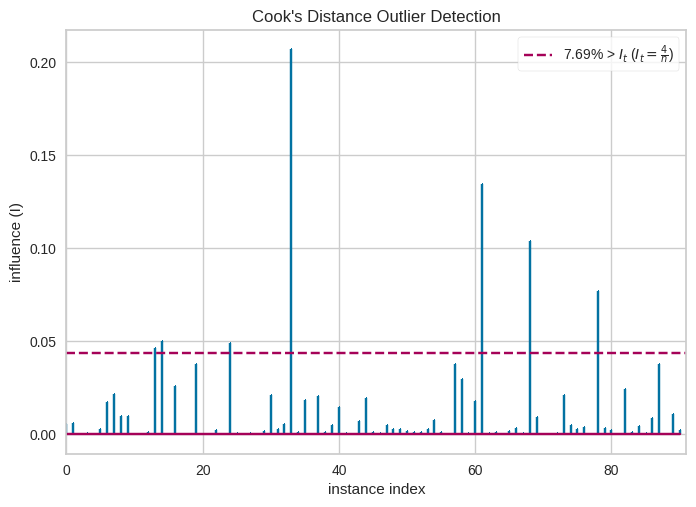

In [ ]:
# cooks distance plot
plot_model(et, plot = 'cooks')

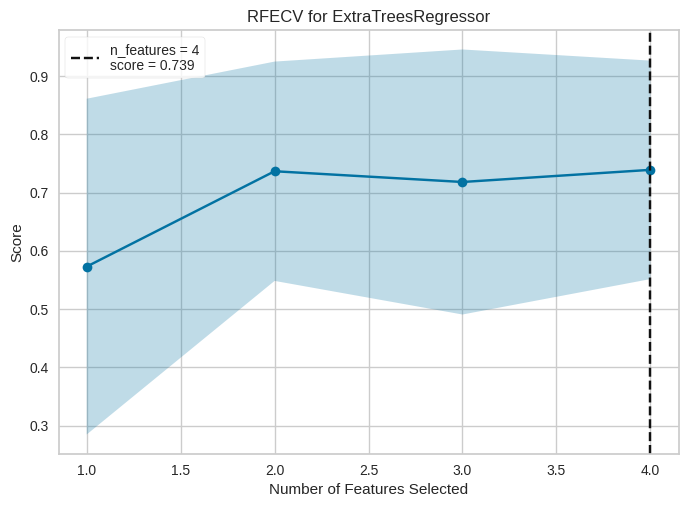

In [ ]:
# recursive feature selection
plot_model(et, plot = 'rfe')

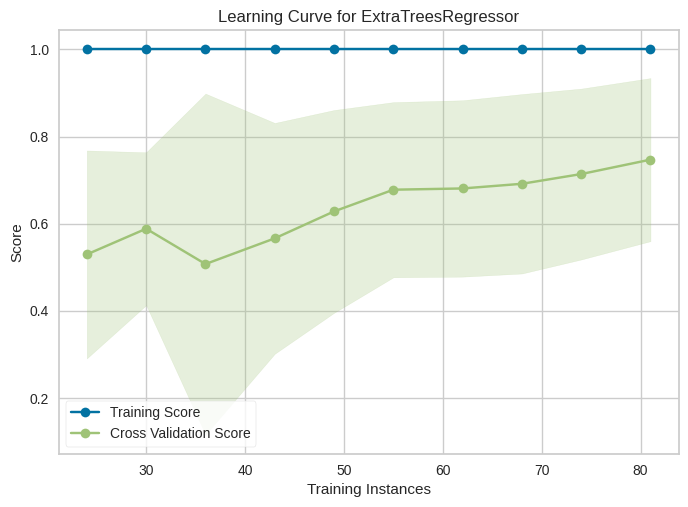

In [ ]:
# learning curve
plot_model(et, plot = 'learning')

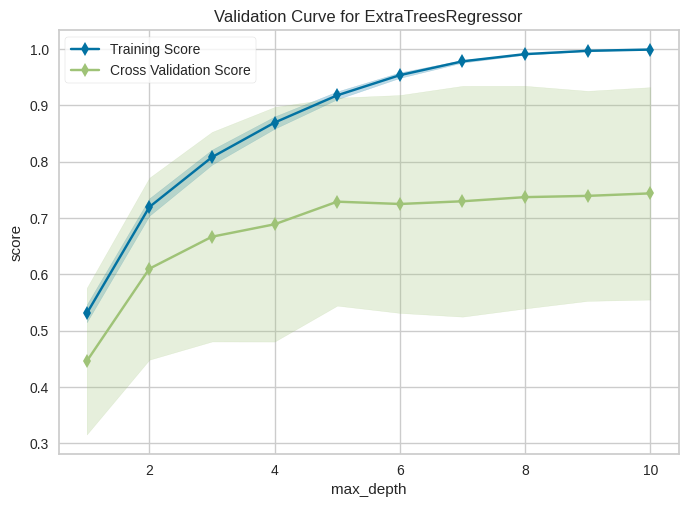

In [ ]:
# validation curve
plot_model(et, plot = 'vc')

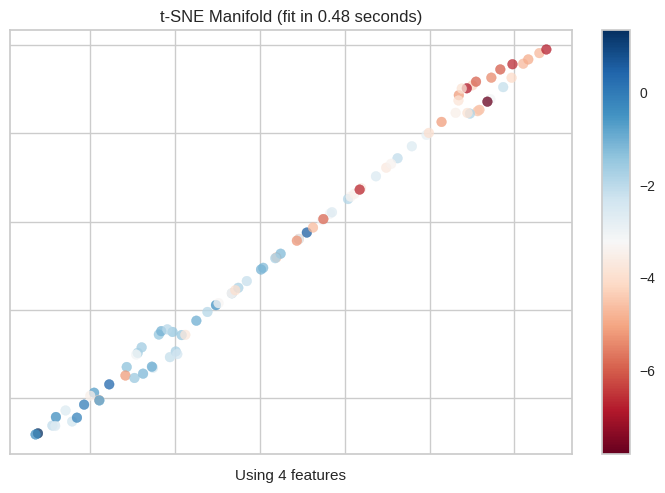

In [ ]:
# manifold learning plot
plot_model(et, plot = 'manifold')

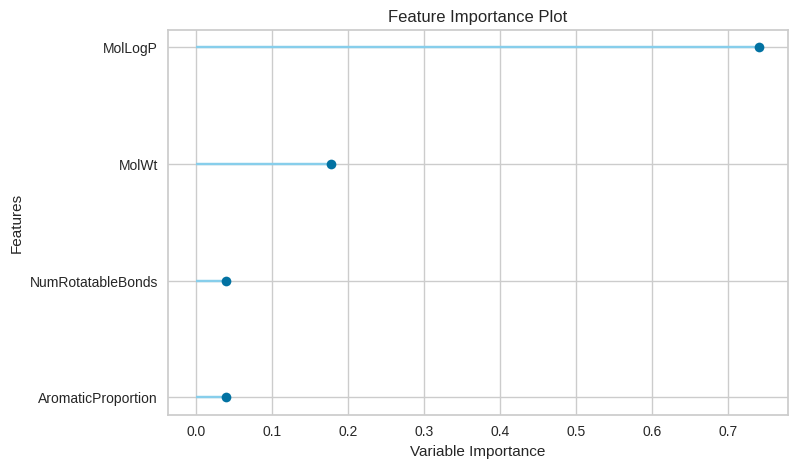

In [ ]:
# plot feature importance
plot_model(best, plot = 'feature')

## Evaluate Model

In [ ]:
# evaluate model
evaluate_model(et)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Finalize Model

In [ ]:
# finalize a model
finalize_model(et)

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MolLogP', 'MolWt',
                                             'NumRotatableBonds',
                                             'AromaticProportion'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('actual_estimator',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

## Prediction

In [ ]:
# predict on test set
holdout_pred = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.7273,0.8718,0.9337,0.8051,0.2559,0.7491


In [ ]:
# show predictions df
holdout_pred.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,prediction_label
681,5.26898,349.429993,5.0,0.461538,-6.025,-5.71126
373,1.84570,360.450012,3.0,0.000000,-3.850,-2.06777
541,2.09160,128.214996,0.0,0.000000,-1.290,-1.72016
381,1.84560,227.337006,5.0,0.400000,-3.040,-2.31554
141,1.02480,88.150002,0.0,0.000000,-0.400,-0.48502


In [ ]:
# copy data and drop Class variable
new_data = data.copy()
new_data.drop('logS', axis=1, inplace=True)
new_data.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.5954,167.850,0.0,0.0
1,2.3765,133.405,0.0,0.0
2,2.5938,167.850,1.0,0.0
3,2.0289,133.405,1.0,0.0
4,2.9189,187.375,1.0,0.0


In [ ]:
# predict model on new_data
predictions = predict_model(et, data = new_data)
predictions.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,prediction_label
0,2.5954,167.850006,0.0,0.0,-1.7092
1,2.3765,133.404999,0.0,0.0,-1.9794
2,2.5938,167.850006,1.0,0.0,-1.7400
3,2.0289,133.404999,1.0,0.0,-1.4800
4,2.9189,187.375000,1.0,0.0,-3.7649


## Interpret Model

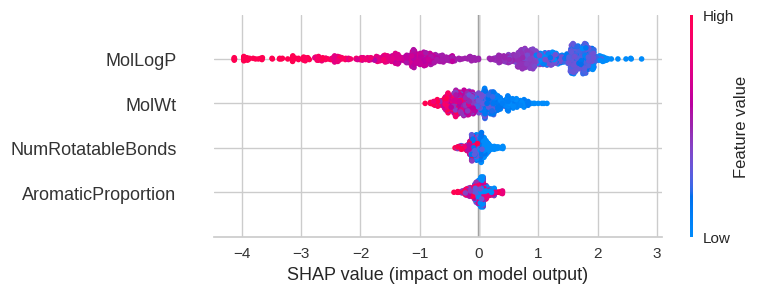

In [ ]:
# interpret model
interpret_model(et)

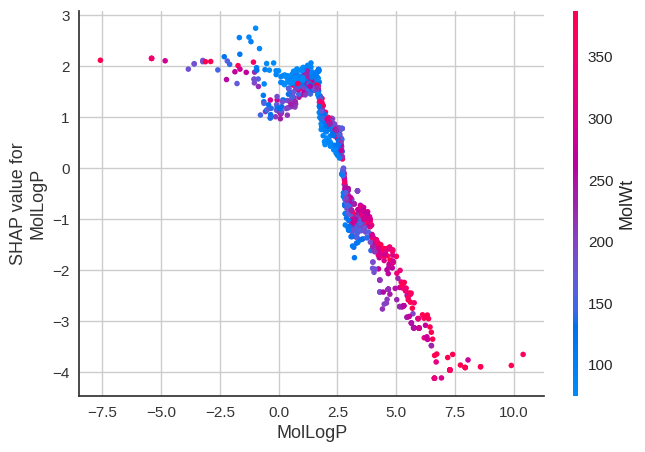

In [ ]:
# correlation plot
interpret_model(et, plot = "correlation")

In [ ]:
# reason plot
interpret_model(et, plot = "reason", observation = 10)

## Save Model

In [ ]:
# save pipeline
save_model(et, '../models/esol')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MolLogP', 'MolWt',
                                              'NumRotatableBonds',
                                              'AromaticProportion'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 '../models/esol.pkl')

In [ ]:
# save pipeline
import os

# Define the directory path
model_dir = '../models'

# Create the directory if it doesn't exist
if not os.path.exists(model_dir):
    os.makedirs(model_dir)

# Save the model
save_model(et, os.path.join(model_dir, 'esol'))

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['MolLogP', 'MolWt',
                                              'NumRotatableBonds',
                                              'AromaticProportion'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model',
                  ExtraTreesRegressor(n_jobs=-1, random_state=123))]),
 '../models/esol.pkl')

In [ ]:
# load pipeline
loaded_best_pipeline = load_model('../models/esol')
loaded_best_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['MolLogP', 'MolWt',
                                             'NumRotatableBonds',
                                             'AromaticProportion'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model',
                 ExtraTreesRegressor(n_jobs=-1, random_state=123))])

In [ ]:
# prediction
prediction_holdout = predict_model(et)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Extra Trees Regressor,0.7273,0.8718,0.9337,0.8051,0.2559,0.7491


In [ ]:
prediction_holdout.head()

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS,prediction_label
681,5.26898,349.429993,5.0,0.461538,-6.025,-5.71126
373,1.84570,360.450012,3.0,0.000000,-3.850,-2.06777
541,2.09160,128.214996,0.0,0.000000,-1.290,-1.72016
381,1.84560,227.337006,5.0,0.400000,-3.040,-2.31554
141,1.02480,88.150002,0.0,0.000000,-0.400,-0.48502


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['MolLogP'].plot(kind='hist', bins=20, title='MolLogP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['MolWt'].plot(kind='hist', bins=20, title='MolWt')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['NumRotatableBonds'].plot(kind='hist', bins=20, title='NumRotatableBonds')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='index', y='MolLogP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='MolLogP', y='MolWt', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='MolWt', y='NumRotatableBonds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='NumRotatableBonds', y='AromaticProportion', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['MolLogP'].plot(kind='line', figsize=(8, 4), title='MolLogP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['MolWt'].plot(kind='line', figsize=(8, 4), title='MolWt')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['NumRotatableBonds'].plot(kind='line', figsize=(8, 4), title='NumRotatableBonds')
plt.gca().spines[['top', 'right']].set_visible(False)